# House Prices Advanced Learning Regression Techniques 

# Data Understanding

Useful Links:
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques
- http://jse.amstat.org/v19n3/decock.pdf
- http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

### Load the Ames, Iowa Housing Data Set

In [ ]:
housing=pd.read_csv('data/train.csv')

## Exploratory Data Analaysis

In [ ]:
housing.head()

In [ ]:
housing.shape

In [ ]:
housing.columns.tolist()

### The Meaning of Each Feature
- Id: Observation number
- MSSubClass: Identifies the type of dwelling involved in the sale
- MSZoning: Identifies the general zoning classification of the sale
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale
- SalePrice: Sale price 



### The Features Categorized
- **20 Continuous Variables**
    - LotFrontage: Linear feet of street connected to property
    - LotArea: Lot size in square feet
    - MasVnrArea: Masonry veneer area in square feet
    - BsmtFinSF1: Type 1 finished square feet
    - BsmtFinSF2: Type 2 finished square feet
    - BsmtUnfSF: Unfinished square feet of basement area
    - TotalBsmtSF: Total square feet of basement area
    - 1stFlrSF: First Floor square feet
    - 2ndFlrSF: Second floor square feet
    - LowQualFinSF: Low quality finished square feet (all floors)
    - GrLivArea: Above grade (ground) living area square feet
    - GarageArea: Size of garage in square feet
    - WoodDeckSF: Wood deck area in square feet
    - OpenPorchSF: Open porch area in square feet
    - EnclosedPorch: Enclosed porch area in square feet
    - 3SsnPorch: Three season porch area in square feet
    - ScreenPorch: Screen porch area in square feet
    - PoolArea: Pool area in square feet
    - MiscVal: Value of miscellaneous feature
    - SalePrice: Sale price 
    

- **15 Discrete Variables**
    - Id: Observation number
    - YearBuilt: Original construction date
    - YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
    - BsmtFullBath: Basement full bathrooms
    - BsmtHalfBath: Basement half bathrooms
    - FullBath: Full bathrooms above grade
    - HalfBath: Half baths above grade
    - Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
    - Kitchen: Kitchens above grade
    - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    - Fireplaces: Number of fireplaces
    - GarageYrBlt: Year garage was built
    - GarageCars: Size of garage in car capacity
    - MoSold: Month Sold (MM)
    - YrSold: Year Sold (YYYY)


- **46 Categorical Variables**
    - 23 Nominal Variables:
        - MSSubClass: Identifies the type of dwelling involved in the sale.
        - MSZoning: Identifies the general zoning classification of the sale.
        - Street: Type of road access to property
        - Alley: Type of alley access to property
        - LandContour: Flatness of the property
        - LotConfig: Lot configuration
        - Neighborhood: Physical locations within Ames city limits
        - Condition1: Proximity to various conditions
        - Condition2: Proximity to various conditions (if more than one is present)
        - BldgType: Type of dwelling
        - HouseStyle: Style of dwelling
        - RoofStyle: Type of roof
        - RoofMatl: Roof material
        - Exterior1st: Exterior covering on house
        - Exterior2nd: Exterior covering on house (if more than one material)
        - MasVnrType: Masonry veneer type
        - Foundation: Type of foundation
        - Heating: Type of heating
        - CentralAir: Central air conditioning
        - GarageType: Garage location
        - MiscFeature: Miscellaneous feature not covered in other categories
        - SaleType: Type of sale
        - SaleCondition: Condition of sale
        
    - 23 Ordinal Variables:
        - LotShape: General shape of property
        - Utilities: Type of utilities available
        - LandSlope: Slope of property
        - OverallQual: Rates the overall material and finish of the house
        - OverallCond: Rates the overall condition of the house
        - ExterQual: Evaluates the quality of the material on the exterior 
        - ExterCond: Evaluates the present condition of the material on the exterior
        - BsmtQual: Evaluates the height of the basement
        - BsmtCond: Evaluates the general condition of the basement
        - BsmtExposure: Refers to walkout or garden level walls
        - BsmtFinType1: Rating of basement finished area
        - BsmtFinType2: Rating of basement finished area (if multiple types)
        - HeatingQC: Heating quality and condition
        - Electrical: Electrical system
        - KitchenQual: Kitchen quality
        - Functional: Home functionality (Assume typical unless deductions are warranted)
        - FireplaceQu: Fireplace quality
        - GarageFinish: Interior finish of the garage
        - GarageQual: Garage quality
        - GarageCond: Garage condition
        - PavedDrive: Paved driveway
        - PoolQC: Pool quality
        - Fence: Fence quality




**_NOTE: I SHOULD DROP ID COLUMN_**

In [ ]:
housing.Id

### Distribution of all numerical variables

In [ ]:
housing.hist(bins=50, figsize=(20,15))

### Distribution of all continuous features

In [ ]:
continuous = ['LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'SalePrice']

In [ ]:
housing[continuous].hist(bins=50, figsize=(20,15))

In [ ]:
housing['PoolArea'].value_counts()

In [ ]:
housing['LowQualFinSF'].value_counts()

**_NOTE:_** 
- **_Much of the continuous features are skewed. I should normalize._** 
- **_I can get rid of some of these features like 'PoolArea' and 'LowQualFinSF' that add nothing to the data._** 

### Descriptive statistics of the numerical features

In [ ]:
housing.describe()

### Count distribution of each categorical feature

In [ ]:
housing.select_dtypes(include=[np.object]).columns.tolist()

In [ ]:
categorical = ['MSSubClass',
'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in categorical:
    display(housing[feature].value_counts().to_frame())
    print(f'There are {housing[feature].unique().size} features in {feature}.')

- **_Street and Utilities to name a couple seem useless._**
- **_PoolQC seems to be missing most of its data..._**

In [ ]:
housing['PoolQC']

### Missing Values

In [ ]:
housing.columns[housing.isnull().any()].size

In [ ]:
missing_cols = housing.columns[housing.isnull().any()].to_list()
missing_cols

In [ ]:
missing = 1 - housing.count()/len(housing) 

**Percentage of missing values:**

In [ ]:
missing[missing > 0].sort_values(ascending=False)

In [ ]:
missing[missing > 0].sort_values().plot.bar(color=np.random.rand(len(missing),3))

**_NOTE:_**
- **_I'll have to get rid of some features and replace the missing values in other features, depending on their effect on Sales Price._**


**Relationship between the missing values and sales price**

In [ ]:
housing[missing[missing > 0].index]

In [ ]:
housing1 = housing[missing_cols].copy()
housing1[missing_cols] = np.where(housing[missing[missing > 0].index].isnull(), 1, 0)
housing1 = pd.concat([housing1, housing[['SalePrice']]], axis=1)
housing1

In [ ]:
for feature in missing_cols:
    housing1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(f'Missingness in {feature}')
    plt.ylabel('SalePrice')
    plt.show()

**_Due to the relationship between the missing values and SalePrice, it would prove useful to replace them with meaningful values._**

### Correlation among the numerical features 

In [ ]:
numerical = housing.select_dtypes(include=[np.number]).columns.tolist()
numerical

In [ ]:
correlation = housing[numerical].corr()
correlation

In [ ]:
correlation['SalePrice'].sort_values(ascending=False)

In [ ]:
f,ax = plt.subplots(figsize=(25,25))
sns.heatmap(correlation, vmax=.8, linewidths=0.01, linecolor='white', square=True)

**_There is high multicolinearity._**

**Let's see the features that have a correlation with SalePrice that's greater than .5.**

In [ ]:
n=11
features = correlation['SalePrice'].sort_values(ascending=False).index.tolist()[:n]
features

In [ ]:
np.corrcoef(housing[features].values)

In [ ]:
correlation.loc[features,features]

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation.loc[features,features], vmax=0.8, annot=True, linewidths=0.01, linecolor='white', square=True)

**_Multicolinearity can be seen more plainly. For instance, GarageCars and GarageArea have a pearson correlation coefficient of 0.88. Since SalePrice and GarageCars have a higher correlation coefficient than SalePrice and GarageArea, it'd make sense to get rid of GarageArea_**.

### Outliers

Documentation: 
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.

In [ ]:
plt.scatter(housing['GrLivArea'],housing['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
housing['GrLivArea'].nlargest(5)

In [ ]:
f,ax = plt.subplots(figsize=(10,5))
plt.boxplot(housing['GrLivArea'], vert=False)
plt.yticks(ticks=[])
plt.title('GrLivArea')
plt.show()

**I see 4 values here. Let's see what other outliers may exist in the data.**

In [ ]:
for feature in continuous:
#     if 0 not in housing[feature].unique():
    f,ax = plt.subplots(figsize=(12,3))
    sns.boxplot(x=housing[feature])
    plt.yticks(ticks=[])
    plt.title(feature)
    plt.show()

**_Outliers exist in the data..._**

In [ ]:
missing = missing[missing > 0]

# Data Preparation

## Feature Engineering

In [ ]:
# from sklearn.model_selection import train_test_split
# # X_train,X_test,y_train,y_test = train_test_split(housing.drop('SalePrice', axis=1), housing['SalePrice'], test_size=.25, random_state=0)

### Drop Id Column

In [ ]:
housingFE = housing.drop(columns='Id')
housingFE.head()

### Outliers

In [ ]:
housingFE.shape

In [ ]:
housingFE[housingFE['GrLivArea'] > 4000].shape

In [ ]:
housingFE = housingFE[housingFE['GrLivArea'] < 4000]
housingFE.shape

In [ ]:
housingFE[housingFE['LotFrontage'] > 200].shape

In [ ]:
housingFE = housingFE[(housingFE['LotFrontage'].isna()) | (housingFE['LotFrontage'] < 200)]
housingFE.shape

In [ ]:
housingFE = housingFE[housingFE['LotArea'] < 100000] 
housingFE.shape

In [ ]:
housingFE.to_csv('housingFE.csv',index=False)

In [ ]:
housingFE = pd.read_csv('housingFE.csv')
housingFE.head()

### Missing Values

In [ ]:
missing.sort_values(ascending=False)

According to the documentation, the **NA** in the follow features means "not present" or "no access." Let's give the **NA**s a different value.

    PoolQC          
    MiscFeature     
    Alley           
    Fence           
    FireplaceQu     
    GarageYrBlt     
    GarageType      
    GarageFinish    
    GarageQual      
    GarageCond      
    BsmtFinType2    
    BsmtExposure    
    BsmtFinType1    
    BsmtCond        
    BsmtQual        
    MasVnrArea      
    MasVnrType      

In [ ]:
def replace_na_cat(data,features):
    data_copy = data.copy()
    data[features] = data[features].fillna('NotApplicable')
    return data

features = ['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

housingFE=replace_na_cat(housingFE,features)
housingFE.head(10)


Note: Since there are no '0' values in the 'LotFrontage' feature, it's possible that the missing values, although not specified in the documentation, should be 0 to reflect that the street isn't directly connected to the property. The lack of **NA** values in the 'Street' feature doesn't affect my hypothesis since one can still have road access without the road being directly connected to one's property. SO, I'll make those **NA** values zero as well.

In [ ]:
def replace_na_num(data,features):
    data_copy = data.copy()
    data[features] = data[features].fillna(0)
    return data

features = ['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

housingFE=replace_na_num(housingFE,features)
housingFE.head(10)


In [ ]:
missing = 1 - housingFE.count()/len(housingFE) 
missing = missing[missing > 0]
missing.sort_values(ascending=False)

In [ ]:
housingFE[housingFE['Electrical'].isna()]

Given that the only feature that has a missing value is 'Electrical', and the SalePrice for that house is nearly equal to the average SalePrice, I'm going to get rid of that row.

In [ ]:
housingFE = housingFE[~housingFE['Electrical'].isna()]
housingFE.shape

In [ ]:
# housingFE.to_csv('housingFE.csv',index=False)

In [ ]:
# housingFE = pd.read_csv('housingFE.csv', keep_default_na=True)
# housingFE.head(10)

### Imputation
All the missing values are accounted for so there's no need for imputation.

In [ ]:
# from impyute.imputation.cs import mice
# imputed_numerics = mice(housingFE[numerical])
# imputed_numerics.columns = housingFE[numerical].columns
# imputed_numerics.head() 


### Encoding Data

**I need to encode the following features:**

In [ ]:
housingFE[housingFE.select_dtypes(include=[np.object]).columns]

In [ ]:
for feature in housingFE.select_dtypes(include=[np.object]).columns:
    display(housingFE[housingFE.select_dtypes(include=[np.object]).columns][feature].value_counts().to_frame())
    print(f'There are {housing[feature].unique().size} features in {feature}.')



In [ ]:
housingFE.select_dtypes(include=[np.object]).columns


In [ ]:
nominal = ['MSSubClass', 
'MSZoning', 
'Street',
'Alley', 
'LandContour', 
'LotConfig', 
'Neighborhood',
'Condition1', 
'Condition2', 
'BldgType', 
'HouseStyle',
'RoofStyle', 
'RoofMatl', 
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation', 
'Heating', 
'CentralAir',
'GarageType',
'MiscFeature',
'SaleType',
'SaleCondition']
 
ordinal = ['LotShape', 
'Utilities', 
'LandSlope', 
'OverallQual',
'OverallCond',
'ExterQual',
'ExterCond',
'BsmtQual', 
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC', 
'Electrical', 
'KitchenQual', 
'Functional',
'FireplaceQu', 
'GarageFinish',
'GarageQual', 
'GarageCond',
'PavedDrive', 
'PoolQC', 
'Fence']
 


In [ ]:
noms = set(housingFE.select_dtypes(include=[np.object]).columns) & set(nominal)
noms

In [ ]:
ords = set(housingFE.select_dtypes(include=[np.object]).columns) & set(ordinal)
ords

In [ ]:
for feature in noms:
    display(housingFE[housingFE.select_dtypes(include=[np.object]).columns][feature].value_counts().to_frame())
    print(f'There are {housing[feature].unique().size} features in {feature}.')


In [ ]:
for feature in ords:
    display(housingFE[housingFE.select_dtypes(include=[np.object]).columns][feature].value_counts().to_frame())
    print(f'There are {housing[feature].unique().size} features in {feature}.')


**Encode Nominal Data: Dummy Encoding**

In [ ]:
# def encode_nominals(data,features):
#     from sklearn.preprocessing import OneHotEncoder
#     import numpy as np
#     ohencoder = OneHotEncoder()
#     data_copy = data.copy()
#     encfeaturesT = []
#     for feature in features:
#         encfeaturesT.append(ordencoder.fit_transform(data_copy[[feature]]).reshape((-1,1)))
#     encfeatures = np.concatenate((encfeaturesT), axis=1)
#     return pd.DataFrame(encfeatures, columns = features)

def encode_noms(data,features):
    import pandas as pd
    return pd.get_dummies(data,columns=features,drop_first=True)



In [ ]:
housingE = encode_noms(housingFE,noms)
housingE.head()

**Encode Ordinal Data: Integer Encoding**

In [ ]:
# def encode_ordinals(data,features):
#     from sklearn.preprocessing import OrdinalEncoder
#     import numpy as np
#     enc = OrdinalEncoder()
#     data_copy = data.copy()
#     encfeaturesT = []
#     for feature in features:
#         encfeaturesT.append(enc.fit_transform(data_copy[[feature]]).reshape((-1,1)))
#     encfeatures = np.concatenate((encfeaturesT), axis=1)
#     return pd.DataFrame(encfeatures, columns = features)

def encode_ords(data,features):
#     pip install category_encoders
    from category_encoders.ordinal import OrdinalEncoder
    enc = OrdinalEncoder(cols=features,return_df=True)
    return enc.fit_transform(data)


In [ ]:
housingE = encode_ords(housingE,ords)   
housingE.head()

In [ ]:
type(housingE)

In [ ]:
pd.pandas.set_option('display.max_rows',None)

In [ ]:
housingE.dtypes

### Normalize Numerical Variables

Not applicable; normalization is not required for XGBoost.

## Feature Selection
Not applicable; XGBoost does feature selection for you.

# Data Modeling

https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
%matplotlib inline

In [2]:
housingE = pd.read_csv('housingE.csv')

In [3]:
X, y = housingE.drop(columns='SalePrice'), housingE['SalePrice']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
gbmr = GradientBoostingRegressor()

In [13]:
gbmr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
print('The R^2 is %.3f' %(gbmr.score(X_train, y_train)))

The R^2 is 0.972


In [22]:
print('The R^2 is %.3f' %(gbmr.score(X_test, y_test)))

The R^2 is 0.841


In [5]:
# pip install xgboost

In [32]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [13]:
params = {
    'n_estimators':[10000],
    'max_depth':[3,5],
    'learning_rate':np.linspace(0.001,0.1,4),#
    'gamma':np.linspace(0,1,5),#
    'min_child_weight':np.linspace(1,5,3),#
    'subsample':np.linspace(0.3,0.9,3), # 
    'colsample_bytree':np.linspace(0.3,0.9,3),#
    'reg_alpha':[0,.01,.1,.5,1],#
    'reg_lambda':[0,.01,.1,.5,1],#    
    'scale_pos_weight':np.linspace(1,5,3)#
}

# params = {
#     'max_depth':[3],#
# }

xgb_estimator = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000,
     subsample=0.6, colsample_bytree=0.6,seed=42)

gsearch = GridSearchCV(estimator=xgb_estimator,param_grid=params,
                       scoring='neg_root_mean_squared_error',n_jobs=-1,
                       refit='neg_root_mean_squared_error',cv=10,verbose=11)
# from tqdm import tqdm

# for i in tqdm(range(1000)):
%time gsearch.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    7.0s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    7.0s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    7.0s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    7.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    7.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    7.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.3s finished


Wall time: 11 s


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.6,
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimat...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=42, subsample=0.6, tree_method=None,
 

In [68]:
gsearch.cv_results_

{'mean_fit_time': array([3.09749949]),
 'std_fit_time': array([0.87882171]),
 'mean_score_time': array([0.01850007]),
 'std_score_time': array([0.00964615]),
 'param_max_depth': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1}],
 'split0_test_score': array([-21703.39373214]),
 'split1_test_score': array([-20688.52698205]),
 'split2_test_score': array([-23608.43981119]),
 'split3_test_score': array([-27010.94073564]),
 'split4_test_score': array([-22358.44276509]),
 'split5_test_score': array([-21487.20842915]),
 'split6_test_score': array([-30220.45969669]),
 'split7_test_score': array([-28617.18640532]),
 'split8_test_score': array([-24301.47469112]),
 'split9_test_score': array([-24122.69834891]),
 'mean_test_score': array([-24411.87715973]),
 'std_test_score': array([3047.78956121]),
 'rank_test_score': array([1])}

In [76]:
print(f'Best Estimator: {gsearch.best_estimator_}')
print(f'Best Parameters: {gsearch.best_params_}')
print(f'Best Score: {gsearch.best_score_}')

Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)
Best Parameters: {'max_depth': 1}
Best Score: -24411.87715972943


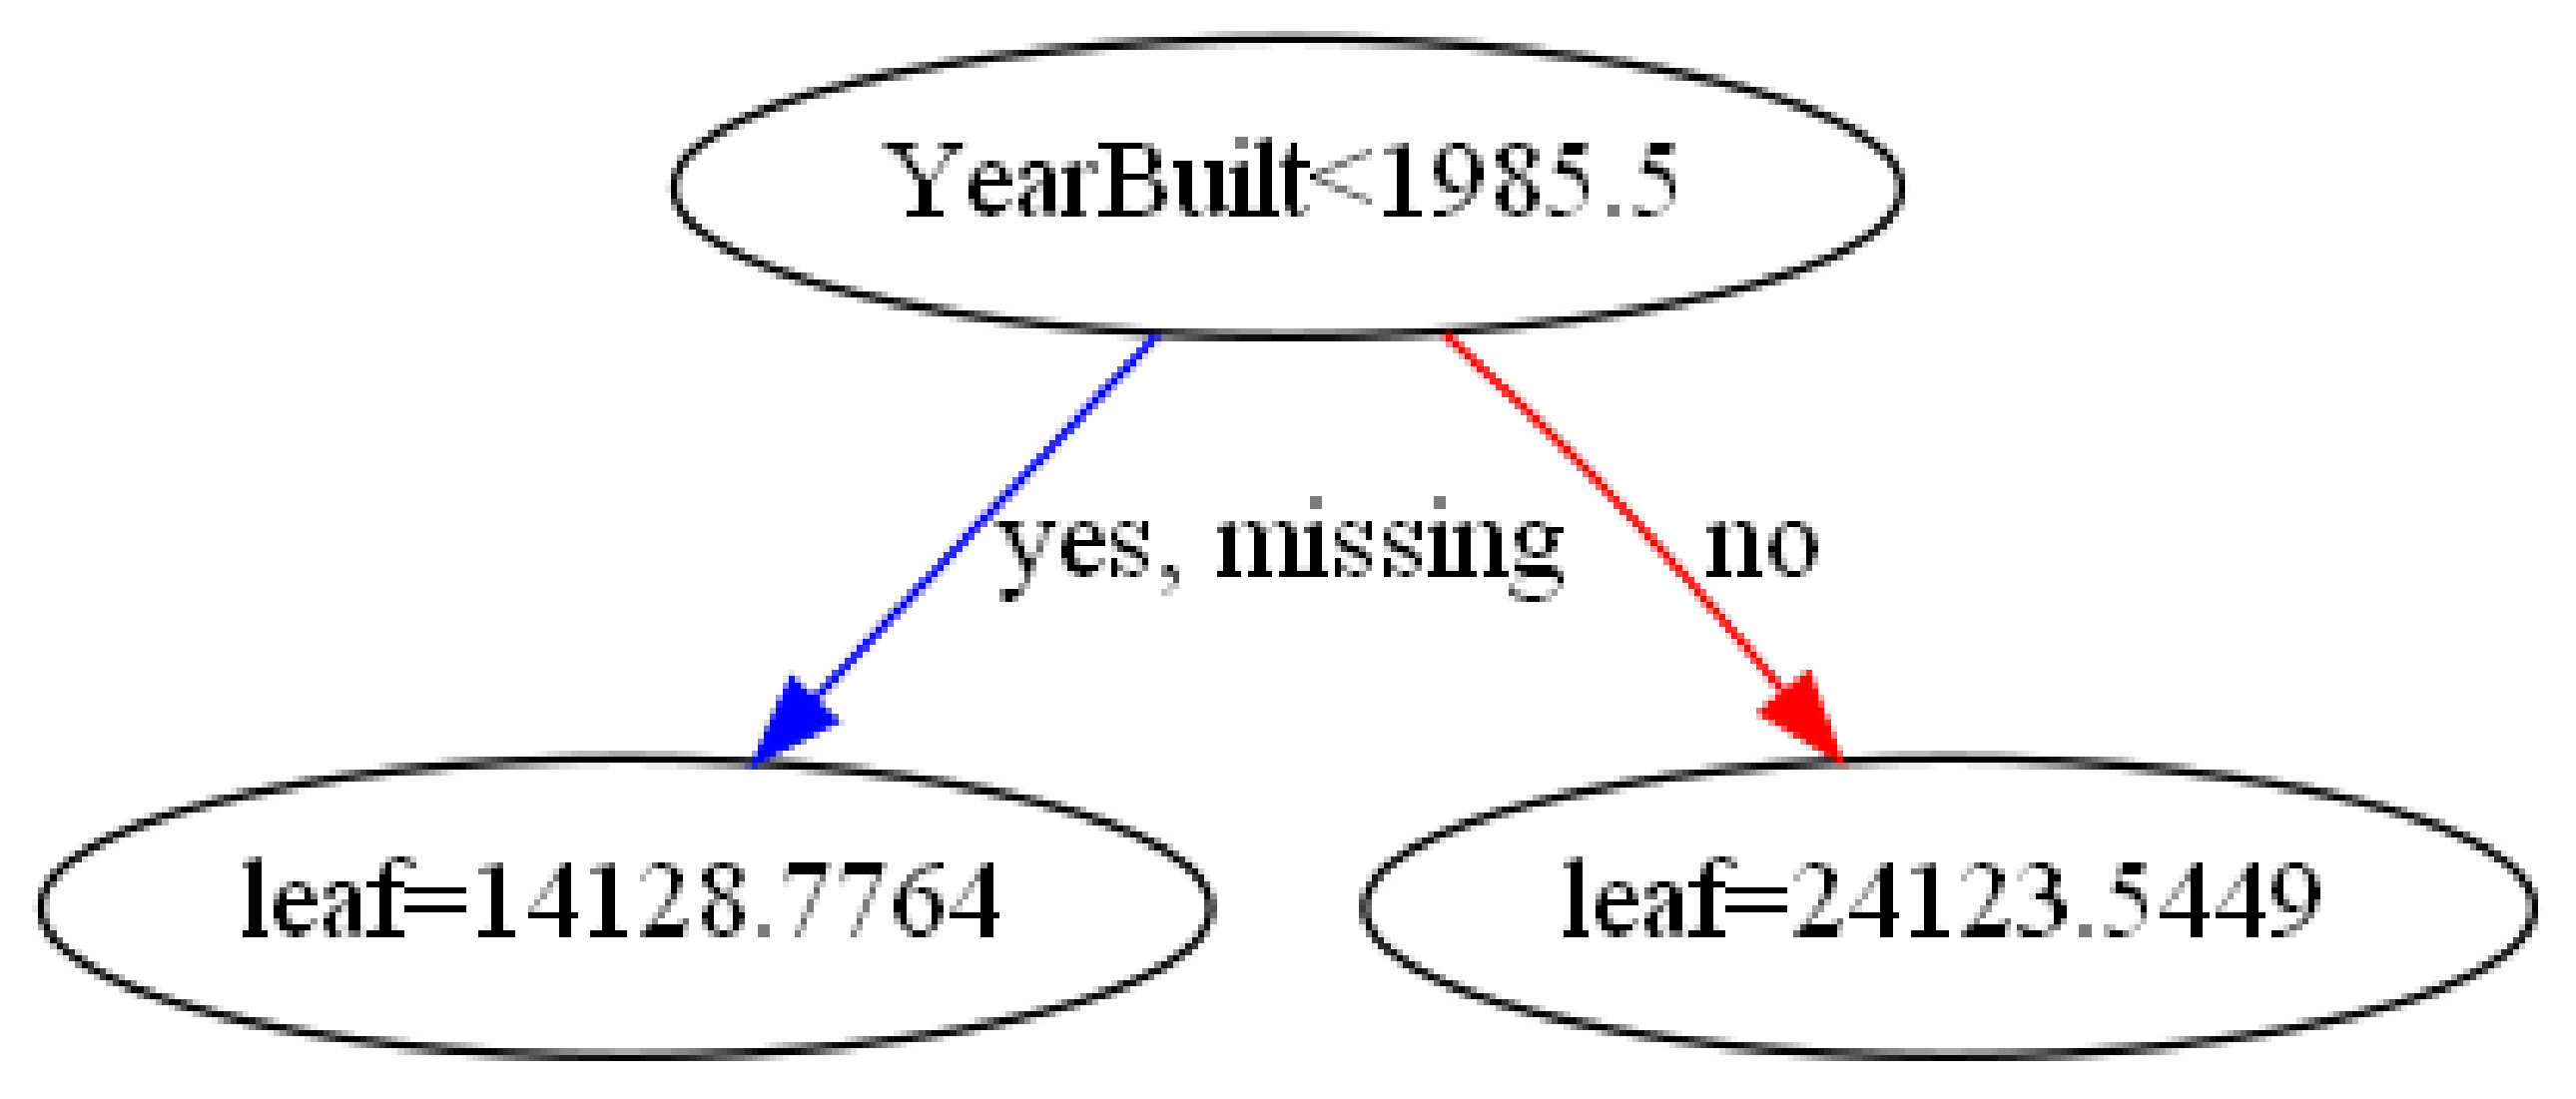

In [87]:
xgb.plot_tree(gsearch.best_estimator_)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

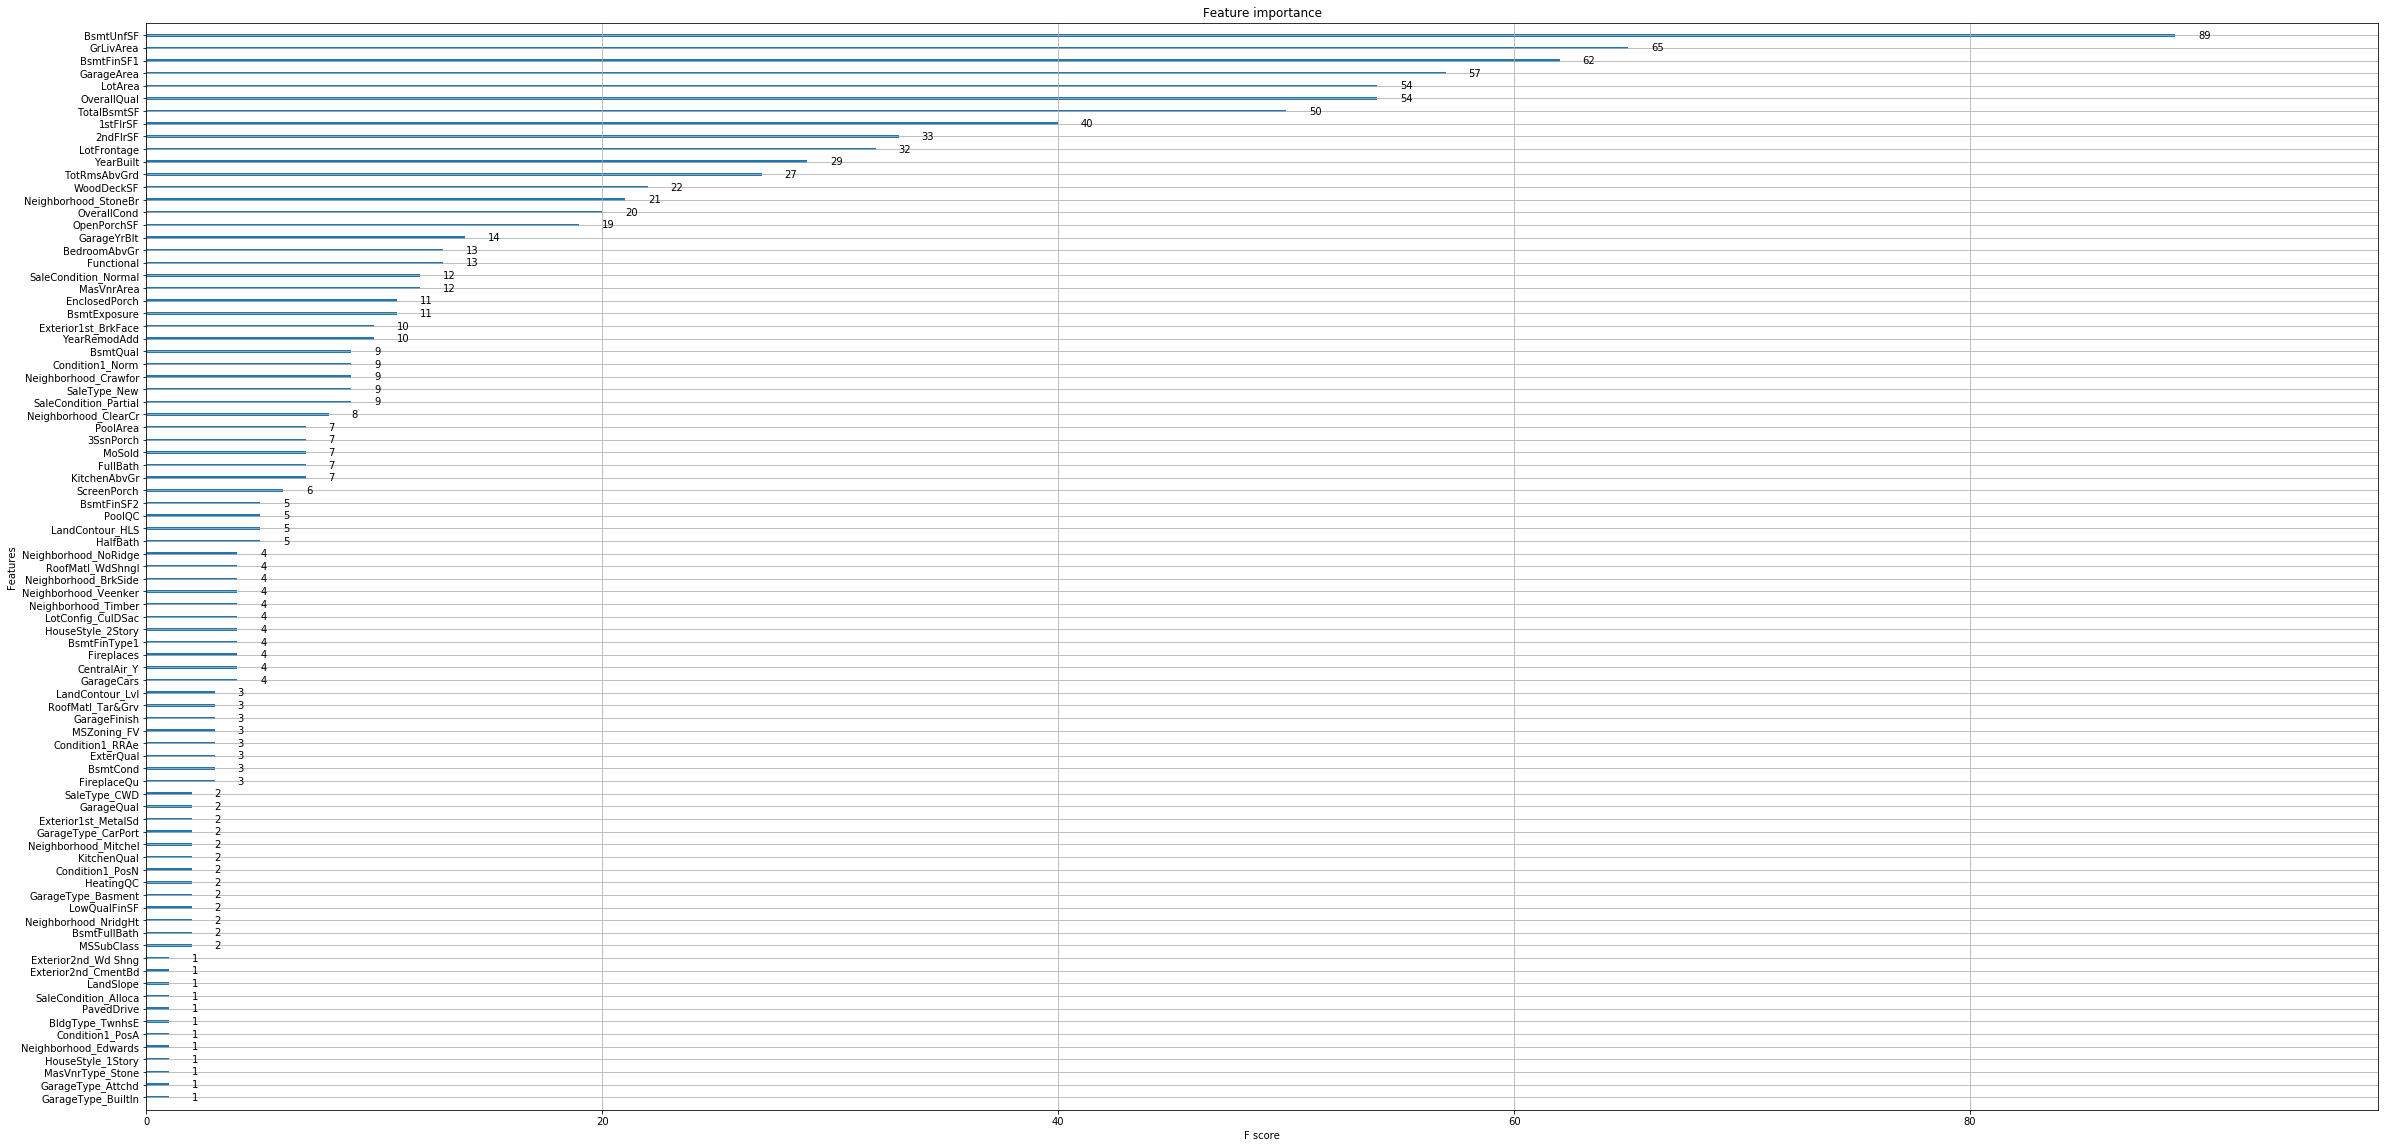

In [86]:
xgb.plot_importance(gsearch.best_estimator_)
plt.rcParams['figure.figsize'] = [60, 20]
plt.show()